## Lab | Revisiting Machine Learning Case Study   
  
Complete the following steps on the categorical columns in the dataset:      

- Check for null values in all the columns   

- Exclude the following variables by looking at the definitions. Create a new empty list called drop_list. We will append this list and then drop all the columns in this list later:   

OSOURCE - symbol definitions not provided, too many categories   
ZIP CODE - we are including state already   
Identify columns that over 85% missing values   

- Remove those columns from the dataframe   

- Reduce the number of categories in the column GENDER. The column should only have either "M" for males, "F" for females, and "other" for all the rest   

- Note that there are a few null values in the column. We will first replace those null values using the code below:   
print(categorical['GENDER'].value_counts())   
categorical['GENDER'] = categorical['GENDER'].fillna('F')   

In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [137]:
data = pd.read_csv('learningSet.csv')
data

C:\Users\danie\AppData\Local\Temp\ipykernel_13020\2501196348.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('learningSet.csv')


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,,,0,0,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,,,5001,0,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,,,3801,0,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,,,4005,0,X,...,18.0,1,L,4,F,X,X,X,11.0,A


In [138]:
data.shape

(95412, 481)

In [139]:
# Check for null values in all the columns
print("Nulls")
for i in data.columns: 
  print(i, "contains", 100*sum(data[i].isnull()) / len(data[i]) ,"%")

Nulls
ODATEDW contains 0.0 %
OSOURCE contains 0.0 %
TCODE contains 0.0 %
STATE contains 0.0 %
ZIP contains 0.0 %
MAILCODE contains 0.0 %
PVASTATE contains 0.0 %
DOB contains 0.0 %
NOEXCH contains 0.0 %
RECINHSE contains 0.0 %
RECP3 contains 0.0 %
RECPGVG contains 0.0 %
RECSWEEP contains 0.0 %
MDMAUD contains 0.0 %
DOMAIN contains 0.0 %
CLUSTER contains 0.0 %
AGE contains 24.802959795413575 %
AGEFLAG contains 0.0 %
HOMEOWNR contains 0.0 %
CHILD03 contains 0.0 %
CHILD07 contains 0.0 %
CHILD12 contains 0.0 %
CHILD18 contains 0.0 %
NUMCHLD contains 87.01840439357733 %
INCOME contains 22.30956273843961 %
GENDER contains 0.0 %
WEALTH1 contains 46.88299165723389 %
HIT contains 0.0 %
MBCRAFT contains 55.395547729845305 %
MBGARDEN contains 55.395547729845305 %
MBBOOKS contains 55.395547729845305 %
MBCOLECT contains 55.458432901521824 %
MAGFAML contains 55.395547729845305 %
MAGFEM contains 55.395547729845305 %
MAGMALE contains 55.395547729845305 %
PUBGARDN contains 55.395547729845305 %
PUBCULIN 

In [140]:
#Exclude the following variables by looking at the definitions. Create a new empty list called drop_list. We will append this list and then drop all the columns in this list later:
drop_list = []

# Append the columns to be dropped to the drop_list
drop_list.append("OSOURCE")
drop_list.append("ZIP")

# Now, you can proceed to drop all the columns in the drop_list from the DataFrame
data.drop(columns=drop_list, inplace=True)


In [141]:
# Identify columns that over 85% missing values. Remove those columns from the dataframe
#Threshold for nulls = 85%
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_percentage

ODATEDW     0.000000
TCODE       0.000000
STATE       0.000000
MAILCODE    0.000000
PVASTATE    0.000000
              ...   
MDMAUD_R    0.000000
MDMAUD_F    0.000000
MDMAUD_A    0.000000
CLUSTER2    0.138347
GEOCODE2    0.138347
Length: 479, dtype: float64

In [142]:
columns_to_drop = missing_percentage[missing_percentage > 85].index.tolist()
columns_to_drop 

['NUMCHLD',
 'RDATE_3',
 'RDATE_4',
 'RDATE_5',
 'RDATE_6',
 'RDATE_7',
 'RDATE_10',
 'RDATE_13',
 'RDATE_15',
 'RDATE_17',
 'RDATE_20',
 'RDATE_21',
 'RDATE_23',
 'RAMNT_3',
 'RAMNT_4',
 'RAMNT_5',
 'RAMNT_6',
 'RAMNT_7',
 'RAMNT_10',
 'RAMNT_13',
 'RAMNT_15',
 'RAMNT_17',
 'RAMNT_20',
 'RAMNT_21',
 'RAMNT_23']

In [143]:
data.drop(columns=columns_to_drop, inplace=True)


In [144]:
data

,ODATEDW,TCODE,STATE,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,0,IL,,,3712,0,,,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,1,CA,,,5202,0,,,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,1,NC,,,0,0,,,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,0,CA,,,2801,0,,,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,0,FL,,,2001,0,X,X,,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,AK,,,0,0,,,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,1,TX,,,5001,0,,,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,1,MI,,,3801,0,,X,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,0,CA,,,4005,0,X,,,...,18.0,1,L,4,F,X,X,X,11.0,A


In [145]:
# Reduce the number of categories in the column GENDER. The column should only have either "M" for males, "F" for females, and "other" for all the rest
data["GENDER"].unique()


array(['F', 'M', ' ', 'C', 'U', 'J', 'A'], dtype=object)

In [146]:
def map_gender(value):
    if value == 'M':
        return 'M'
    elif value == 'F':
        return 'F'
    else:
        return 'other'

# Aplicar la función de mapeo a la columna 'gender'
data['GENDER'] = data['GENDER'].map(map_gender)

# Verificar los nuevos valores únicos en la columna 'gender'
valores_unicos_genero = data['GENDER'].unique()

# Imprimir los valores únicos después de la transformación
print(valores_unicos_genero)

['F' 'M' 'other']


In [147]:
data["GENDER"].unique()

array(['F', 'M', 'other'], dtype=object)

In [148]:
# Note that there are a few null values in the column. We will first replace those null values using the code below:
#print(categorical['GENDER'].value_counts())
#categorical['GENDER'] = categorical['GENDER'].fillna('F')

In [149]:
data['GENDER'].isnull().sum()

0

## Lab | Feature engineering

- Check for null values in the numerical columns.   
- Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.   
- Use appropriate EDA technique where ever necessary.   

In [150]:
#Check for null values in the numerical columns.
numerical = data.select_dtypes(np.number)
numerical.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,NaN,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0.0,0.0,3.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,0.0,0.0,1.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,1.0,4.0,2,0.0,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,3.0,2.0,60,1.0,0.0,9.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0


In [151]:
print("Nulls")
for i in numerical.columns: 
  print(i, "contains", 100*sum(numerical[i].isnull()) / len(numerical[i]) ,"%")

Nulls
ODATEDW contains 0.0 %
TCODE contains 0.0 %
DOB contains 0.0 %
AGE contains 24.802959795413575 %
INCOME contains 22.30956273843961 %
WEALTH1 contains 46.88299165723389 %
HIT contains 0.0 %
MBCRAFT contains 55.395547729845305 %
MBGARDEN contains 55.395547729845305 %
MBBOOKS contains 55.395547729845305 %
MBCOLECT contains 55.458432901521824 %
MAGFAML contains 55.395547729845305 %
MAGFEM contains 55.395547729845305 %
MAGMALE contains 55.395547729845305 %
PUBGARDN contains 55.395547729845305 %
PUBCULIN contains 55.395547729845305 %
PUBHLTH contains 55.395547729845305 %
PUBDOITY contains 55.395547729845305 %
PUBNEWFN contains 55.395547729845305 %
PUBPHOTO contains 55.395547729845305 %
PUBOPP contains 55.395547729845305 %
MALEMILI contains 0.0 %
MALEVET contains 0.0 %
VIETVETS contains 0.0 %
WWIIVETS contains 0.0 %
LOCALGOV contains 0.0 %
STATEGOV contains 0.0 %
FEDGOV contains 0.0 %
WEALTH2 contains 45.930281306334635 %
POP901 contains 0.0 %
POP902 contains 0.0 %
POP903 contains 0.0 %

In [152]:
#Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

median_adi = numerical['ADI'].median()
median_dma = numerical['DMA'].median()
median_msa = numerical['MSA'].median()
median_adi = numerical['WEALTH1'].median()
# Reemplazamos los valores nulos en las columnas 'ADI', 'DMA' y 'MSA' con sus respectivas medianas
numerical['ADI'].fillna(median_adi, inplace=True)
numerical['DMA'].fillna(median_dma, inplace=True)
numerical['MSA'].fillna(median_msa, inplace=True)
numerical['WEALTH1'].fillna(median_msa, inplace=True)

In [153]:
numerical[['WEALTH1', 'ADI', 'DMA', 'MSA']]

,WEALTH1,ADI,DMA,MSA
0,3350.0,177.0,682.0,0.0
1,9.0,13.0,803.0,4480.0
2,1.0,281.0,518.0,0.0
3,4.0,67.0,862.0,9340.0
4,2.0,127.0,528.0,5000.0
...,...,...,...,...
95407,3350.0,0.0,743.0,380.0
95408,9.0,201.0,618.0,3360.0
95409,3350.0,61.0,551.0,4040.0
95410,3350.0,13.0,803.0,8735.0


In [154]:
numerical[['WEALTH1', 'ADI', 'DMA', 'MSA']].sum().isnull()

WEALTH1    False
ADI        False
DMA        False
MSA        False
dtype: bool

In [155]:
#Use appropriate EDA technique where ever necessary.

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


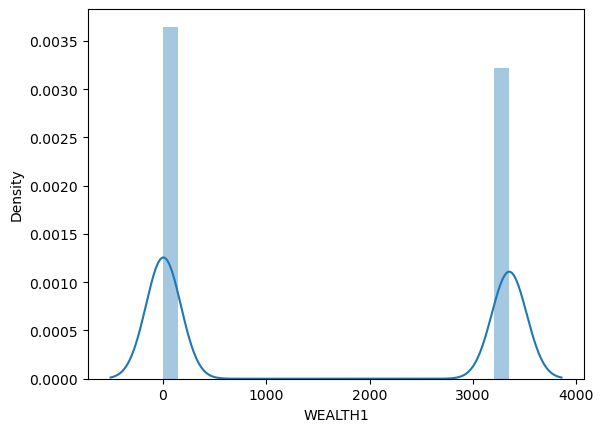

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


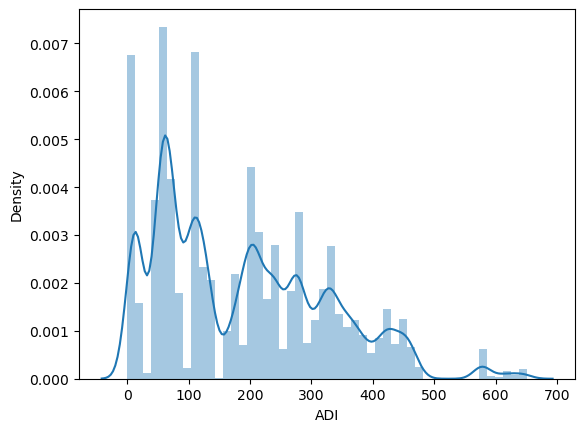

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


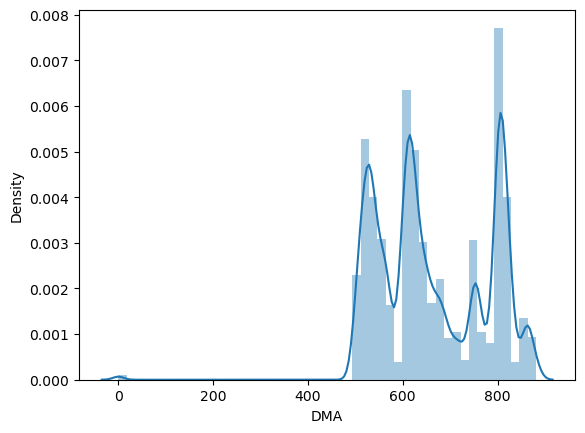

C:\Users\danie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


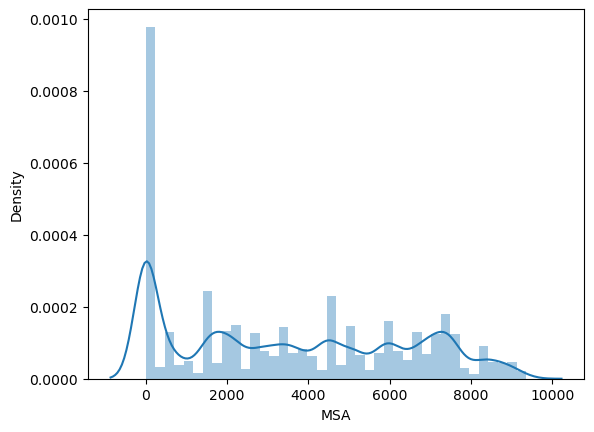

In [160]:
sns.distplot(numerical['WEALTH1'])
plt.show()
sns.distplot(numerical['ADI'])
plt.show()
sns.distplot(numerical['DMA'])
plt.show()
sns.distplot(numerical['MSA'])
plt.show()